**Day 11: Introduction to Data Preprocessing in Python**

1. Overview of Data Preprocessing

Importance and Goals

- Importance: Essential for converting raw data into a format suitable for analysis.

- Goals: Enhance data quality, improve analysis efficiency, and prepare data for machine learning.

Data Preprocessing Workflow
- Cleaning Data: Remove duplicates, correct errors.

- Handling Missing Values: Impute missing values or remove them.

- Normalization: Scale data using methods like Min-Max scaling or Z-score normalization.

- Feature Engineering: Create new features from existing data.

2. Understanding Data Types and Scales

Data Types
- Numeric (Quantitative): Numbers representing continuous or discrete data.

- Categorical (Qualitative): Data grouped into categories.

Scales
- Nominal: Categories without order (e.g., blood types).

- Ordinal: Ordered categories (e.g., class levels).

- Interval: Numeric scales without true zero (e.g., temperature in Celsius).

- Ratio: Numeric scales with true zero (e.g., height).

3. Basic (Summary) Statistics in Python

Setup for Activities
- Dataset: Covid Data.
- Tools: Python with Pandas library.

In [1]:
#import relevant libraries
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
from google.colab import files
uploaded = files.upload()

Saving covid_data.csv to covid_data.csv


In [3]:
#load data into dataframe
covid_data = pd.read_csv("covid_data.csv")

In [4]:
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,24/02/2020,5,5,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,25/02/2020,5,0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,26/02/2020,5,0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,27/02/2020,5,0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,28/02/2020,5,0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [5]:
covid_data.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
5813,NGA,Africa,Nigeria,06/10/2022,265741,236,51.286,3155.0,0.0,0.0,...,0.6,10.8,41.949,NaN,54.69,0.539,NaN,NaN,NaN,NaN
5814,NGA,Africa,Nigeria,07/10/2022,265741,0,51.286,3155.0,0.0,0.0,...,0.6,10.8,41.949,NaN,54.69,0.539,NaN,NaN,NaN,NaN
5815,NGA,Africa,Nigeria,08/10/2022,265816,75,55.000,3155.0,0.0,0.0,...,0.6,10.8,41.949,NaN,54.69,0.539,NaN,NaN,NaN,NaN
5816,NGA,Africa,Nigeria,09/10/2022,265816,0,55.000,3155.0,0.0,0.0,...,0.6,10.8,41.949,NaN,54.69,0.539,NaN,NaN,NaN,NaN
5817,NGA,Africa,Nigeria,10/10/2022,265816,0,55.000,3155.0,0.0,0.0,...,0.6,10.8,41.949,NaN,54.69,0.539,NaN,NaN,NaN,NaN


In [6]:
#show all columns in pandas
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5818 entries, 0 to 5817
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    5818 non-null   object 
 1   continent                                   5818 non-null   object 
 2   location                                    5818 non-null   object 
 3   date                                        5818 non-null   object 
 4   total_cases                                 5818 non-null   int64  
 5   new_cases                                   5818 non-null   int64  
 6   new_cases_smoothed                          5788 non-null   float64
 7   total_deaths                                5638 non-null   float64
 8   new_deaths                                  5627 non-null   float64
 9   new_deaths_smoothed                         5596 non-null   float64
 10  total_cases_

In [7]:
#create a dataframe that loads relevant columns
covid_datanew = covid_data[['iso_code','continent','location','date','total_cases','new_cases']]

In [8]:
#displaying the new dataframe
covid_datanew.head()

,iso_code,continent,location,date,total_cases,new_cases
0,AFG,Asia,Afghanistan,24/02/2020,5,5
1,AFG,Asia,Afghanistan,25/02/2020,5,0
2,AFG,Asia,Afghanistan,26/02/2020,5,0
3,AFG,Asia,Afghanistan,27/02/2020,5,0
4,AFG,Asia,Afghanistan,28/02/2020,5,0


In [9]:
#investigating the data type of the dataframe
covid_datanew.dtypes

,0
iso_code,object
continent,object
location,object
date,object
total_cases,int64
new_cases,int64


In [10]:
#displaying the shape of the dataframe (rows x columns)
covid_data.shape

(5818, 67)

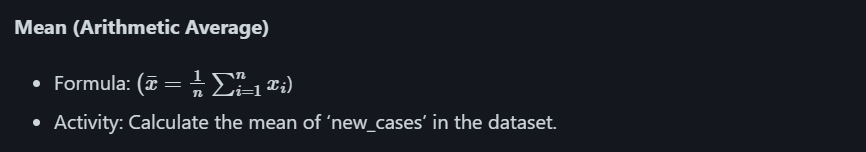

In [11]:
#analyze the mean of the new_cases column using the np.mean() in numpy
newcase_mean = np.mean(covid_datanew["new_cases"])

print("New case (mean):", newcase_mean)

New case (mean): 8814.365761430045


Median (Middle Value in Sorted Data)

- Activity: Find the median of ‘new_cases’ in the dataset

In [12]:
newcase_median = np.median(covid_datanew["new_cases"])

print("New case (median):", newcase_median)

New case (median): 261.0


Mode (Most Frequent Value)

- Activity: Determine the mode for ‘’.

The stats.mode function from the SciPy library returns a ModeResult object, which contains two arrays:

```
The first array (mode): This contains the mode value(s), i.e., the most frequently occurring value(s) in the dataset.
The second array (count): This contains the number of times the mode value(s) appears in the dataset.
```
Both of these are returned as arrays, even if there’s only one mode. When you access the mode using stats.mode(covid_datanew[‘new_cases’])[0], it returns an array with the mode value. The [0] at the end is used to access the first (and in most cases, the only) element of this array.

So, in the context of the code:


```
stats.mode(covid_datanew['new_cases']): Returns a ModeResult object with the mode and its count.
stats.mode(covid_datanew['new_cases'])[0]: Accesses the array containing the mode value(s).
stats.mode(covid_datanew['new_cases'])[0][0]: Accesses the first element of the array, providing the actual mode value.
```

This is necessary because the mode function is designed to handle multi-modal datasets (datasets with more than one mode) and thus returns an array instead of a single value. In most single-mode cases, you’ll need the [0][0] to access the actual mode value.


In [13]:
newcase_mode = stats.mode(covid_datanew["new_cases"])

print("New case (mode):", newcase_mode)

New case (mode): ModeResult(mode=np.int64(0), count=np.int64(805))


*Lets use a non-numeric column to display the mode*



In [14]:
# isocode_mode = stats.mode(covid_datanew["iso_code"])

# print("ISO Code (mode):", isocode_mode)

In [15]:
# There is issue using stas for non numerical columns so i am using the np.unique
values, counts = np.unique(covid_datanew["iso_code"],return_counts=True)
index_mode = np.argmax(counts)
print("Mode",values[index_mode])

Mode AUS


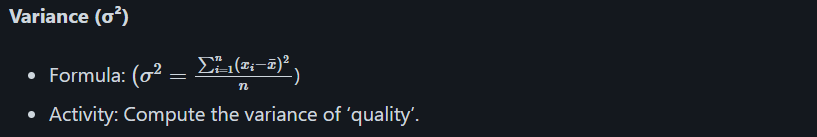

In [16]:
#using numpy check the variance of the new_cases column
newcase_variance = np.var(covid_datanew["new_cases"])

print("New cases (variance:numpy):", newcase_variance)

New cases (variance:numpy): 451321915.92810047


In [17]:
#using numpy check the variance of the new_cases column
# Another way
covid_datanew["new_cases"].var()

451399502.6422019

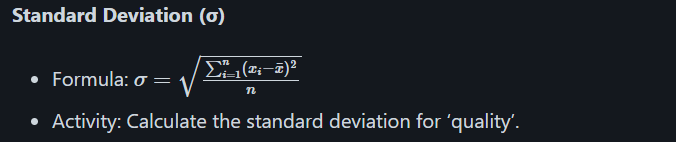

In [18]:
# Calculate the standard deviation using NumPy
# 'ddof=0' for population standard deviation; 'ddof=1' for sample standard deviation
newcase_stdev = np.std(covid_datanew["new_cases"], ddof=1)

print("New cases (stdev: numpy):", newcase_stdev)

New cases (stdev: numpy): 21246.16442189512


In [19]:
covid_datanew["new_cases"].std()

21246.16442189512

*Why would there be a difference in the variance and standard deviation between NumPy and Pandas?*

-> The difference between the numpy var and pandas var methods are not dependent on the range of the data but on the degrees of freedom (ddof) set by package. pandas sets ddof=1 (unbiased estimator) while numpy sets ddof = 0 (mle). RE: https://stackoverflow.com/questions/62938495/difference-between-numpy-var-and-pandas-var



Max and Min Range

The range has a significant role in describing the variability of a data set, as long as there are no outliers. An outlier is an extreme high or low value that stands alone from the other values. If an outlier exist, the value of the range by itself can be misleading.

In [20]:
#Calculate the range of the dataset using NumPy
covid_newcases_max = np.max(covid_datanew["new_cases"])
covid_newcases_min = np.min(covid_datanew["new_cases"])

print(covid_newcases_max, covid_newcases_min)

287149 0


Why are Quartiles and Interquartile Range Important?

Quartiles and the Interquartile Range (IQR) are essential in data analysis for several key reasons:

1. Measure of Spread

 - Quartiles divide a dataset into four equal parts, providing insight into the distribution and variability of the data.

2. Outlier Detection

 - The IQR is a robust measure of statistical dispersion and is commonly used for identifying outliers. Values that fall below Q1 - 1.5*IQR or above Q3 + 1.5*IQR are often considered outliers.

3. Non-parametric

 - Quartiles do not assume a normal distribution of data, making them non-parametric and robust measures for skewed distributions or data with outliers.

4. Data Segmentation and Comparison

 - Quartiles allow for easy segmentation of data into groups, which is useful in various applications like finance and sales.

5. Informative for Further Statistical Analysis

 - Understanding quartile positions helps in making informed decisions for further statistical analyses, especially with skewed data.

6. Basis for Other Statistical Measures

 - Quartiles are foundational for other statistical visualizations like box plots, which depict quartiles and outliers graphically.

In [21]:
# Calculate quartiles
Q1 = np.quantile(covid_data["new_cases"],0.25)
Q3 = np.quantile(covid_data["new_cases"],0.75)

# Calculate the Interquartile Range
IQR = Q3 - Q1

print("Q1 (25th percentile):", Q1)
print("Q3 (75th percentile):", Q3)
print("Interquartile Range:", IQR)

Q1 (25th percentile): 24.0
Q3 (75th percentile): 3666.0
Interquartile Range: 3642.0


**Activity - Hands-On**

Use the data set located at https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho and do a summary statistical analysis using either Pandas of NumPy.

Calculate basic (summary) statistics for this data set

Let do this using Panda as using Numpy we have already done above

In [22]:
from google.colab import files
uploaded = files.upload()

Saving car data.csv to car data (1).csv


In [23]:
car_details = pd.read_csv("car data.csv")

In [25]:
car_details.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [26]:
car_details.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [27]:
car_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [28]:
car_details.shape

(301, 9)

In [29]:
car_details.isnull().sum()


,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [30]:
car_details.describe()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [31]:
car_details.describe(include='all')


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [32]:
# Statistical Analysis using pandas
# 1. Mean
mean_value = car_details["Selling_Price"].mean()
print("Mean of Selling Price:", mean_value)

Mean of Selling Price: 4.661295681063123


In [36]:
# 2. Median
median_value = car_details["Selling_Price"].median()
print("Median of Selling Price:", median_value)

# 3. Mode
mode_value = car_details["Selling_Price"].mode()[0]
print("Mode of Selling Price:", mode_value)

Median of Selling Price: 3.6
Mode of Selling Price: 0.45


In [38]:
# 4. Variance
variance_value = car_details["Selling_Price"].var()
print("Variance of Selling Price:", variance_value)

Variance of Selling Price: 25.834973315614626


In [39]:
# 5. Standard Deviation
std_value = car_details["Selling_Price"].std()
print("Standard Deviation of Selling Price:", std_value)

Standard Deviation of Selling Price: 5.082811556177804


In [40]:
# 6. Min and Max
min_value = car_details["Selling_Price"].min()
max_value = car_details["Selling_Price"].max()
print("Range of Selling Price:", min_value,max_value)

Range of Selling Price: 0.1 35.0


In [42]:
# 7. Quartiles and InterQuartile
Q1 = car_details["Selling_Price"].quantile(0.25)
Q3 = car_details["Selling_Price"].quantile(0.75)
IQR = Q3 - Q1
print("Q1 (25th percentile):", Q1)
print("Q3 (75th percentile):", Q3)
print("Interquartile Range:", IQR)

Q1 (25th percentile): 0.9
Q3 (75th percentile): 6.0
Interquartile Range: 5.1
